In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf

2022-06-18 11:53:14.518911: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-18 11:53:14.522791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 11:53:14.522808: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

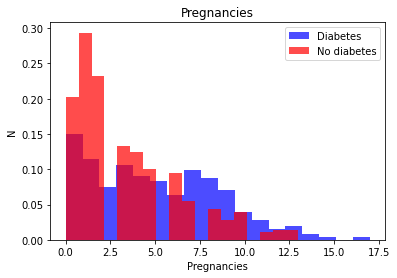

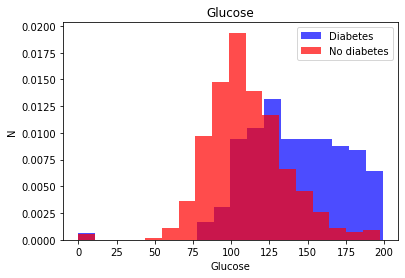

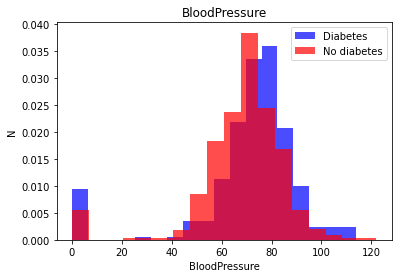

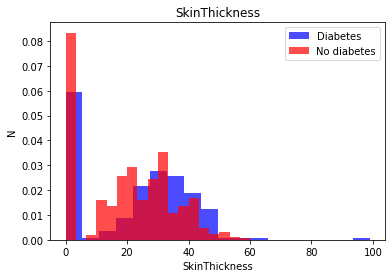

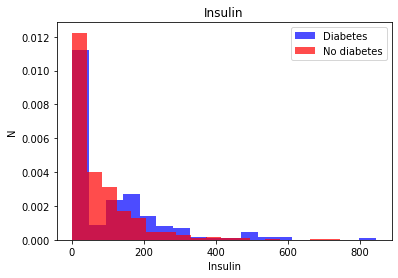

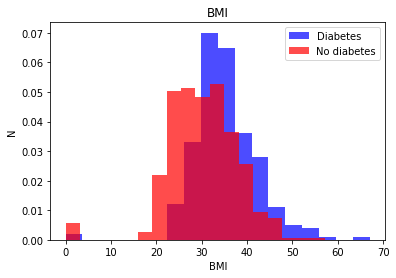

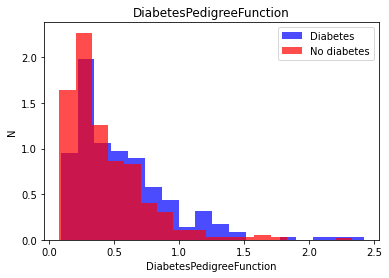

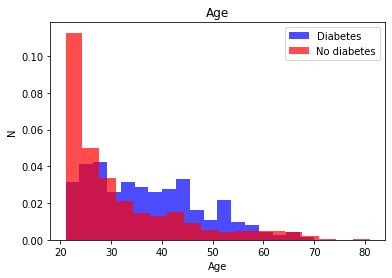

In [5]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
#   Plotting a histograms of when outcomes is 1 or when 2
#   Subsetting a dataframe based on some parameters
#   Normalize the imbalance in outcomes by using density  to compare ratios
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=18)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=18)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [6]:
# Splitting our df into an x feature matrix and y outcome vector
# These columns are now numpy arrays
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values


In [7]:
# Using scikit-learn to split the data set inot train set (60%) and a temporary set(40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
# Temporary set is split into two random datasets for validation(50%) of model and test datasets(50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
# Building the neural-net model using tensorflow keras
# We are using sequential model which groups a linear stack of layers into a tf.keras.Model
model = tf.keras.Sequential([
#     A layer of 16 densly connected neurons, the activation function is Relu
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layer.Dense(1, activation="sigmoid"
])